<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/Logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Problem 1 to 4: Scratch Logistic Regression
import numpy as np
import pickle

class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression
    Parameters
    ----------

    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=True, reg_lambda=0.0):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.reg_lambda = reg_lambda
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _sigmoid(self, z):
        # Problem 1: Hypothesis function
        return 1 / (1 + np.exp(-z))

    def _loss(self, X, y):
        # Problem 4: Objective function with regularization
        m = len(y)
        h = self._sigmoid(np.dot(X, self.coef_))
        epsilon = 1e-15  # prevent log(0)
        cost = (-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon)).mean()
        reg = (self.reg_lambda / (2 * m)) * np.sum(self.coef_[1:] ** 2)
        return cost + reg

    def _gradient_descent(self, X, y):
        # Problem 2: Steepest descent
        m = len(y)
        h = self._sigmoid(np.dot(X, self.coef_))
        error = h - y
        grad = np.dot(X.T, error) / m
        # regularize (skip bias term)
        grad[1:] += (self.reg_lambda / m) * self.coef_[1:]
        self.coef_ -= self.lr * grad

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
            if X_val is not None:
                X_val = np.insert(X_val, 0, 1, axis=1)

        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.iter):
            self._gradient_descent(X, y)
            self.loss[i] = self._loss(X, y)
            if X_val is not None and y_val is not None:
                self.val_loss[i] = self._loss(X_val, y_val)
            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}: Loss = {self.loss[i]:.4f}")

    def predict_proba(self, X):
        # Problem 3: Return probability
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        return self._sigmoid(np.dot(X, self.coef_))

    def predict(self, X):
        # Problem 3: Return class label
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        return (self.predict_proba(X) >= 0.5).astype(int)

    def save_weights(self, filename='weights.npz'):
        # Problem 8: Save learned weights
        np.savez(filename, coef_=self.coef_)

    def load_weights(self, filename='weights.npz'):
        # Problem 8: Load weights
        data = np.load(filename)
        self.coef_ = data['coef_']


In [10]:
# Problems 5 to 8: Verification

# Problem 5: Learning and estimation
import numpy as np

def scratch_train_test_split(X, y, train_size=0.8, random_state=0):
    np.random.seed(random_state)
    y = y.reshape(-1, 1)
    Xy = np.concatenate([X, y], axis=1)
    SIZE = len(Xy)
    pick = int(np.round(SIZE * train_size))
    train_pick = np.random.choice(np.arange(SIZE), pick, replace=False)
    test_pick = np.delete(np.arange(SIZE), train_pick)
    train = Xy[train_pick, :]
    test = Xy[test_pick, :]
    X_train = train[:, :-1].reshape(-1, X.shape[1])
    y_train = train[:, -1].reshape(-1,)
    X_test = test[:, :-1].reshape(-1, X.shape[1])
    y_test = test[:, -1].reshape(-1,)
    return X_train, X_test, y_train, y_test

from sklearn.datasets import load_iris

# Loading and filtering to binary (virgicolor = 1, virginica = 2)
data = load_iris()
X = data.data[data.target != 0]
y = data.target[data.target != 0]
y = y - 1

print("Classes after filter:", np.unique(y))
print("\n")

# Split using scratch_train_test_split
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.8, random_state=0)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
print("\n")

#Standardizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Using class ScratchLogisticRegression I defined earlier
scratch_model = ScratchLogisticRegression(num_iter=1000, lr=0.1, bias=True, verbose=True, reg_lambda=0.1)
scratch_model.fit(X_train, y_train, X_val=X_test, y_val=y_test)

y_pred_scratch = scratch_model.predict(X_test)

# Fit scikit-learn logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

sk_model = LogisticRegression(max_iter=1000)
sk_model.fit(X_train, y_train)
y_pred_sk = sk_model.predict(X_test)

# Comparing these metrics
print("\nScratch Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_scratch))
print("Precision:", precision_score(y_test, y_pred_scratch))
print("Recall:", recall_score(y_test, y_pred_scratch))

print("\nScikit-learn Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_sk))
print("Precision:", precision_score(y_test, y_pred_sk))
print("Recall:", recall_score(y_test, y_pred_sk))



Classes after filter: [0 1]


X_train: (80, 4)
X_test: (20, 4)
y_train: (80,)
y_test: (20,)


Iteration 0: Loss = 0.6546
Iteration 100: Loss = 0.2124
Iteration 200: Loss = 0.1608
Iteration 300: Loss = 0.1383
Iteration 400: Loss = 0.1257
Iteration 500: Loss = 0.1177
Iteration 600: Loss = 0.1121
Iteration 700: Loss = 0.1081
Iteration 800: Loss = 0.1050
Iteration 900: Loss = 0.1026

Scratch Logistic Regression
Accuracy: 0.95
Precision: 1.0
Recall: 0.9

Scikit-learn Logistic Regression
Accuracy: 0.95
Precision: 1.0
Recall: 0.9


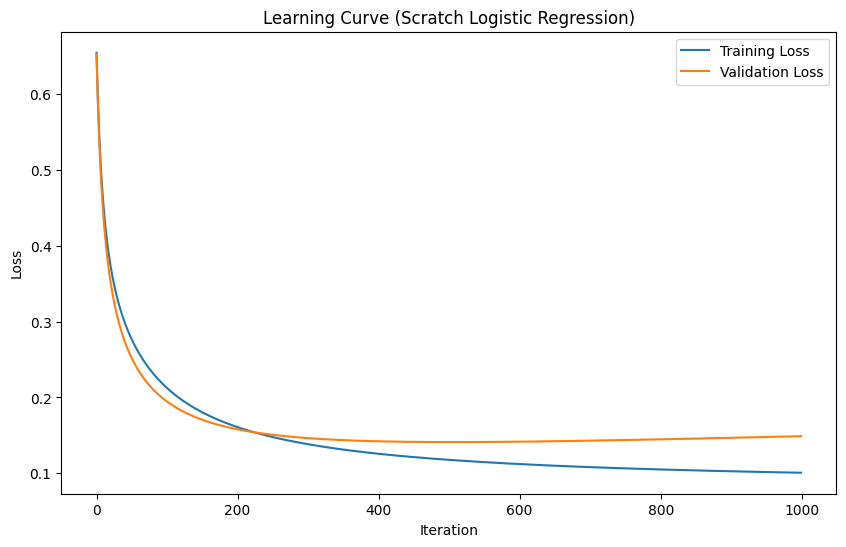

In [11]:
# Problem 6: Plot of learning curve
import matplotlib.pyplot as plt

# Plot training & validation loss over iterations
plt.figure(figsize=(10,6))
plt.plot(scratch_model.loss, label='Training Loss')
plt.plot(scratch_model.val_loss, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning Curve (Scratch Logistic Regression)')
plt.legend()
plt.show()


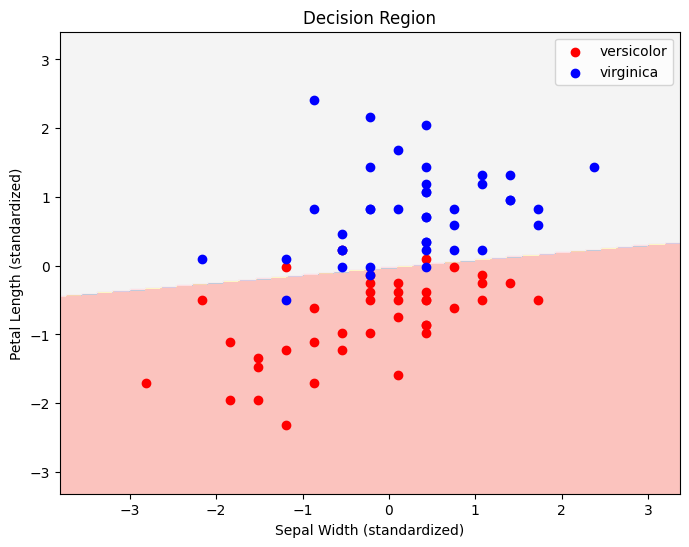

In [14]:
# Problem 7: Visualization of decision area
import numpy as np
import matplotlib.pyplot as plt

# Restricting visualization to only first two features
X_vis_train = X_train[:, [1, 2]]
X_vis_test = X_test[:, [1, 2]]

# Re-fitting a new scratch model for these 2 features only:
scratch_vis_model = ScratchLogisticRegression(num_iter=1000, lr=0.1, bias=True, verbose=False)
scratch_vis_model.fit(X_vis_train, y_train)

# Creating meshgrid over selected features
h = 0.02
x_min, x_max = X_vis_train[:, 0].min() - 1, X_vis_train[:, 0].max() + 1
y_min, y_max = X_vis_train[:, 1].min() - 1, X_vis_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Flattenning mesh and predicting
grid = np.c_[xx.ravel(), yy.ravel()]
Z = scratch_vis_model.predict(grid)
Z = Z.reshape(xx.shape)

# Plotting the decision region
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X_vis_train[y_train==0, 0], X_vis_train[y_train==0, 1], c='red', label='versicolor')
plt.scatter(X_vis_train[y_train==1, 0], X_vis_train[y_train==1, 1], c='blue', label='virginica')
plt.xlabel('Sepal Width (standardized)')
plt.ylabel('Petal Length (standardized)')
plt.title('Decision Region')
plt.legend()
plt.show()


In [15]:
# Problem 8: (Advance assignment) Saving weights
# Saving learned weights to file
scratch_model.save_weights('scratch_logreg_weights.npz')
print("Weights saved to 'scratch_logreg_weights.npz'")

# Loading them back to demonstrate
scratch_model.load_weights('scratch_logreg_weights.npz')
print("Weights loaded successfully. Loaded coefficients:")
print(scratch_model.coef_)

Weights saved to 'scratch_logreg_weights.npz'
Weights loaded successfully. Loaded coefficients:
[-0.03017583 -0.42435596 -0.90309409  2.78797239  3.31979547]
